In [205]:
import numpy as nb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [206]:
df=pd.read_csv('rainfall.csv')

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               54 non-null     object 
 1   rainfall           53 non-null     float64
 2   temperature        53 non-null     float64
 3   humidity           53 non-null     float64
 4   wind_speed         53 non-null     float64
 5   weather_condition  53 non-null     object 
dtypes: float64(4), object(2)
memory usage: 2.7+ KB


print(df.columns)

In [147]:
print(df.columns)

Index(['date', 'rainfall', 'temperature', 'humidity', 'wind_speed',
       'weather_condition'],
      dtype='object')


In [208]:
df.head()

,date,rainfall,temperature,humidity,wind_speed,weather_condition
0,2022-01-01,12.5,15.2,78.0,8.5,Rainy
1,2022-01-02,8.2,17.8,65.0,5.2,Rainy
2,2022-01-03,0.0,20.1,52.0,3.1,Sunny
3,2022-01-04,3.7,18.6,71.0,6.7,Rainy
4,2022-01-05,21.1,14.8,82.0,9.3,Rainy


In [209]:
df.isnull().sum()

date                 0
rainfall             1
temperature          1
humidity             1
wind_speed           1
weather_condition    1
dtype: int64

In [210]:
df=df.dropna()

In [211]:
df.tail()

,date,rainfall,temperature,humidity,wind_speed,weather_condition
48,2022-02-18,11.9,14.1,89.0,10.5,Rainy
49,2022-02-19,17.3,15.9,83.0,8.6,Rainy
50,2022-02-20,9.6,18.6,71.0,6.7,Rainy
51,2022-02-21,0.0,21.3,55.0,5.1,Sunny
52,2022-02-22,7.4,16.8,77.0,8.9,Rainy


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               53 non-null     object 
 1   rainfall           53 non-null     float64
 2   temperature        53 non-null     float64
 3   humidity           53 non-null     float64
 4   wind_speed         53 non-null     float64
 5   weather_condition  53 non-null     object 
dtypes: float64(4), object(2)
memory usage: 2.9+ KB


In [213]:
df.isnull().sum()

date                 0
rainfall             0
temperature          0
humidity             0
wind_speed           0
weather_condition    0
dtype: int64

In [214]:
df['weather_condition']=df['weather_condition'].map({'Rainy':0,'Sunny':1})


In [215]:
df['weather_condition'].unique()

array([0, 1])

In [216]:
df.head()

,date,rainfall,temperature,humidity,wind_speed,weather_condition
0,2022-01-01,12.5,15.2,78.0,8.5,0
1,2022-01-02,8.2,17.8,65.0,5.2,0
2,2022-01-03,0.0,20.1,52.0,3.1,1
3,2022-01-04,3.7,18.6,71.0,6.7,0
4,2022-01-05,21.1,14.8,82.0,9.3,0


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               53 non-null     object 
 1   rainfall           53 non-null     float64
 2   temperature        53 non-null     float64
 3   humidity           53 non-null     float64
 4   wind_speed         53 non-null     float64
 5   weather_condition  53 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 2.9+ KB


In [218]:
df.describe()

,rainfall,temperature,humidity,wind_speed,weather_condition
count,53.000000,53.000000,53.000000,53.000000,53.000000
mean,9.049057,17.950943,69.245283,6.403774,0.207547
std,6.712521,2.500663,11.969361,2.209069,0.409432
min,0.000000,13.900000,44.000000,2.100000,0.000000
25%,3.900000,16.100000,62.000000,4.700000,0.000000
50%,8.300000,17.800000,72.000000,6.700000,0.000000
75%,14.800000,19.400000,78.000000,8.300000,0.000000
max,21.800000,23.400000,89.000000,10.500000,1.000000


C:\Users\Rikesh khadka\AppData\Local\Temp\ipykernel_25036\1720333556.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weather_condition', data=df, palette='coolwarm')


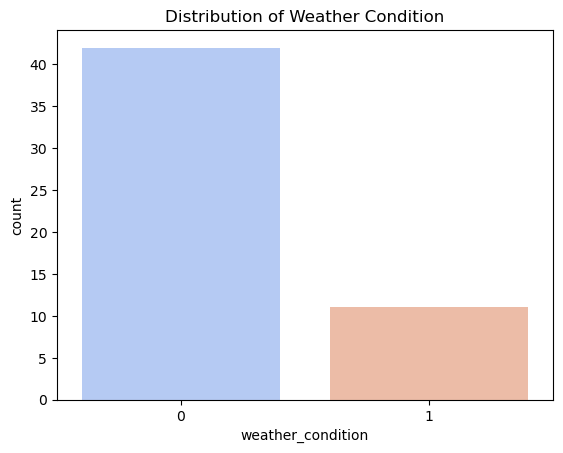

In [219]:
sns.countplot(x='weather_condition', data=df, palette='coolwarm')
plt.title('Distribution of Weather Condition')
plt.show()

In [220]:
df.columns

Index(['date', 'rainfall', 'temperature', 'humidity', 'wind_speed',
       'weather_condition'],
      dtype='object')

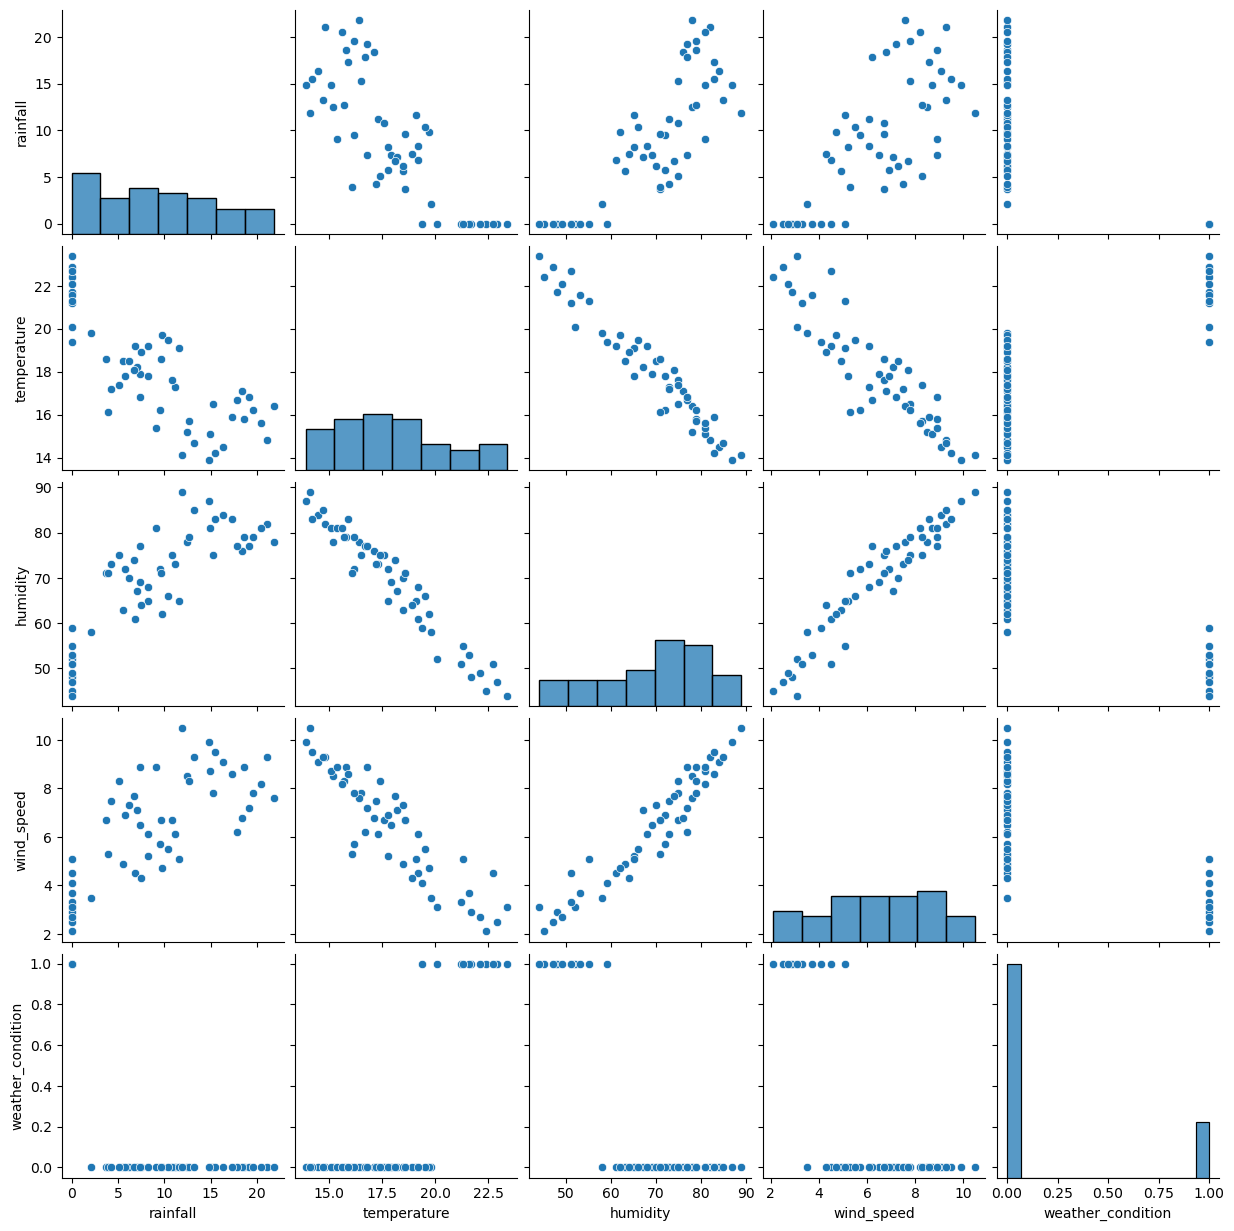

In [221]:
sns.pairplot(df[['rainfall','temperature', 'humidity', 'wind_speed',
       'weather_condition']])

In [222]:
X=df[['rainfall','temperature', 'humidity', 'wind_speed']]
y=df['weather_condition']

In [223]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test,y_train,y_test =train_test_split(X,y,test_size=0.30,random_state=42)
X_test_index = X_test.index

from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_train=X_train.values
X_test=X_test.values
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [224]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [225]:
from sklearn.metrics import accuracy_score, classification_report

In [226]:
y_pred =model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [227]:
results = df.loc[X_test_index, ['date']].copy()
results['actual'] = y_test.values
results['predicted'] = y_pred
results['predicted_label'] = results['predicted'].map({0:'Rainy',1:'Sunny'})

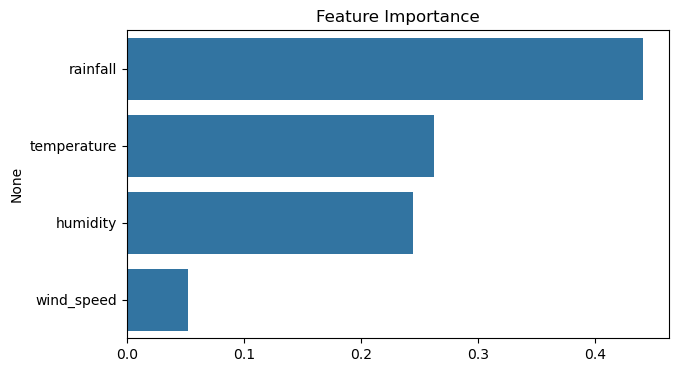

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance")
plt.show()


In [232]:
results = df.loc[X_test_index, ['date']].copy()
results['actual'] = y_test.values
results['predicted'] = y_pred
results['predicted_label'] = results['predicted'].map({0:'Rainy',1:'Sunny'})


In [240]:
results.head()

,date,actual,predicted,predicted_label
19,2022-01-20,0,0,Rainy
41,2022-02-11,1,1,Sunny
47,2022-02-17,0,0,Rainy
12,2022-01-13,1,1,Sunny
43,2022-02-13,0,0,Rainy


In [245]:
df.head()

,date,rainfall,temperature,humidity,wind_speed,weather_condition
0,2022-01-01,12.5,15.2,78.0,8.5,Rainy
1,2022-01-02,8.2,17.8,65.0,5.2,Rainy
2,2022-01-03,0.0,20.1,52.0,3.1,Sunny
3,2022-01-04,3.7,18.6,71.0,6.7,Rainy
4,2022-01-05,21.1,14.8,82.0,9.3,Rainy


In [241]:
df['weather_condition']=df['weather_condition'].map({0:'Rainy',1:'Sunny'})


In [244]:
df.head()

,date,rainfall,temperature,humidity,wind_speed,weather_condition
0,2022-01-01,12.5,15.2,78.0,8.5,Rainy
1,2022-01-02,8.2,17.8,65.0,5.2,Rainy
2,2022-01-03,0.0,20.1,52.0,3.1,Sunny
3,2022-01-04,3.7,18.6,71.0,6.7,Rainy
4,2022-01-05,21.1,14.8,82.0,9.3,Rainy
